# EDA of MovieLens 100k dataset

### Import Packages

In [1]:
!pip install seaborn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import our data

MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota. This dataset consists of:
1) 100,000 ratings (1-5) from 943 users on 1682 movies. 
2) Each user has rated at least 20 movies. 
3)  Simple demographic info for the users (age, gender, occupation, zip)

The data was collected during the seven-month period from September 19th, 
1997 through April 22nd, 1998.

In [3]:
# Import the dataset
df = pd.read_csv('../Katherine W/dataSets/fulldf.csv')
df.head()

,User ID,Item ID,Rating,timestamp,Age,Gender,Occupation,zip code,Movie Title,Release Date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0.0,0,0,0.0,0,0,0.0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0.0,0,0,0.0,0,0,0.0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0.0,0,0,0.0,0,0,0.0,0,0


In [4]:
df.size

976500

In [5]:
num_unique_users = df['User ID'].nunique()
print(f'Number of unique users: {num_unique_users}')

Number of unique users: 943


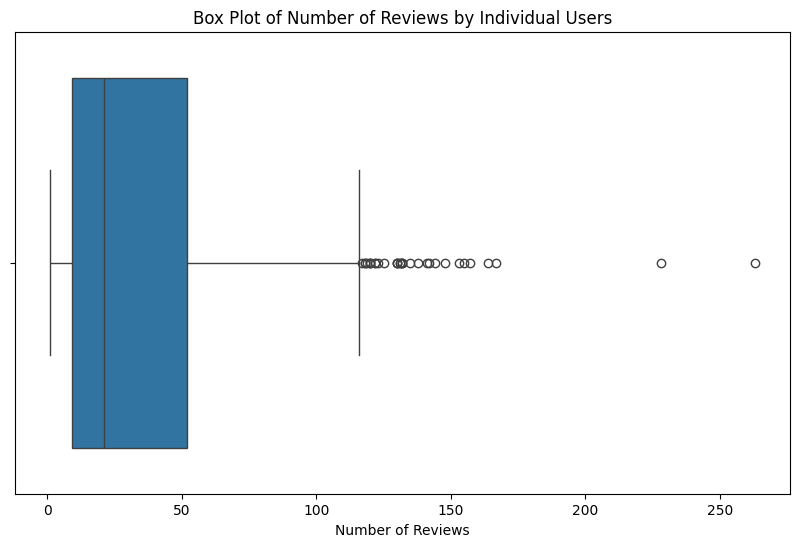

In [6]:
# Calculate the number of reviews done by individual users
user_activity = df.groupby('User ID').size().reset_index(name='count')

# Plot a box plot of the number of reviews done by individual users
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_activity['count'])
plt.xlabel('Number of Reviews')
plt.title('Box Plot of Number of Reviews by Individual Users')
plt.show()

There are a fair amount of outlyers with a large amount of ratings, there is a possibility that they could have a negative influence on our model due to not having a huge range of users, our model could become too tuned towards their preferences and not that of the general population

## Distribution of Ratings

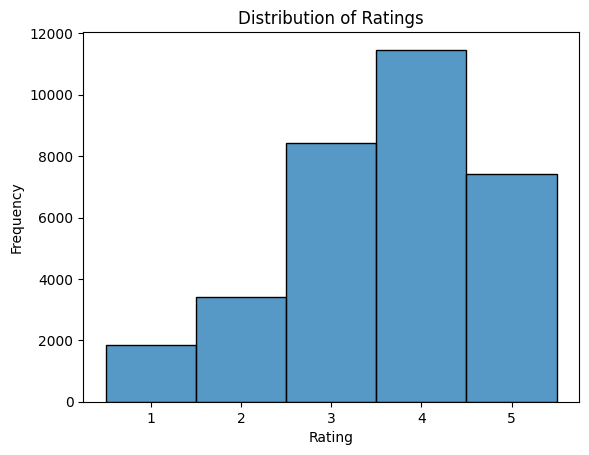

In [7]:
# Plot a histogram of rating distribution using seaborn
sns.histplot(df['Rating'], bins=range(1, 7), discrete=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

The histogram shows there are far more positve ratings than negative, this could have implications for when we are building our recommender models as the models may be less sensitive to negative feedback as it will see less in training. It could also overestimate the user satisfaction, this could be due to users having different ideas of what the ratings represent, i.e. some may see 3 as an average film while others think that represents a bad film.

## Gender Distribution

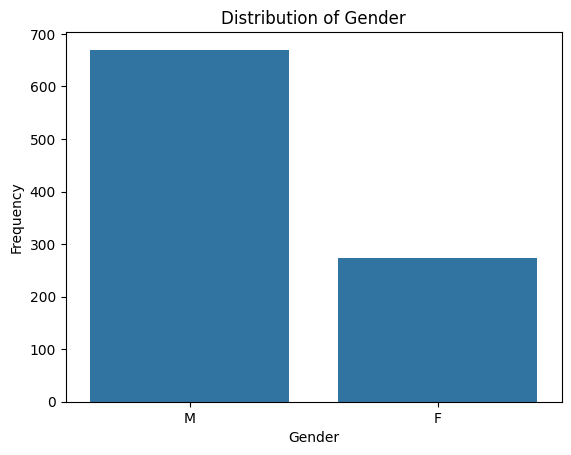

In [ ]:
# Plot a histogram of gender distribution using seaborn
sns.countplot(x='Gender', data=df.drop_duplicates(subset='User ID'))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

There are far more male user than female, this could prove difficult for our predictions if there are big differences in film preferences, it might be hard for accurate ratings to be obtained by female users as the the model is exposed considerably less to their movie ratings

#### Difference in Gender ratings

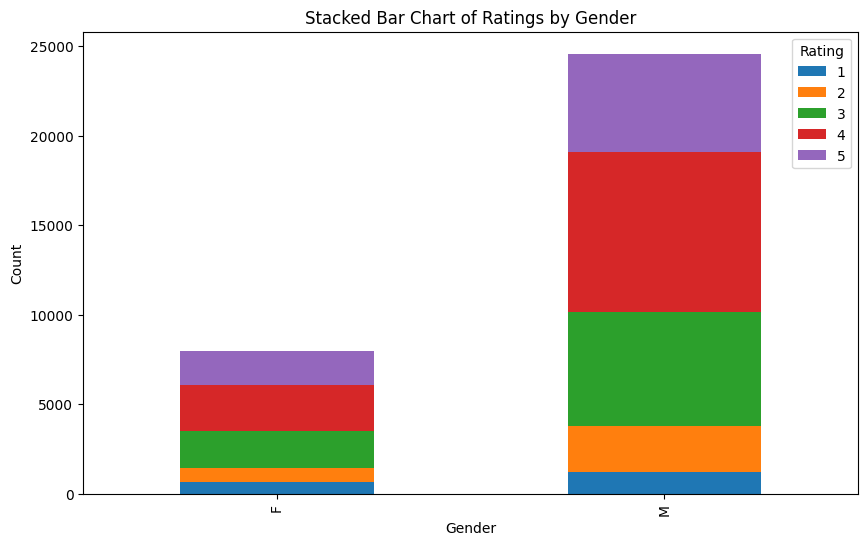

In [18]:
# Group by Gender and Rating, and count the occurrences
gender_rating_counts = df.groupby(['Gender', 'Rating']).size().unstack()

# Plot the stacked bar chart
gender_rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Ratings by Gender')
plt.show()

We can see the distribution of ratings given out by both men and women is extremely similar, which should help us gain accurate predictions

## Most popular Movies

In [19]:
# Filter the dataframe to include only rows where the rating is 5
df_5_ratings = df[df['Rating'] == 5]
df_4_ratings = df[df['Rating'] == 4]
# Combine the dataframes for ratings 5 and 4
df_5_and_4_ratings = pd.concat([df_5_ratings, df_4_ratings])
# Count the number of 5 ratings for each movie
top_10_movies = df_5_and_4_ratings['Item ID'].value_counts().head(10)

top_10_movies_df = top_10_movies.reset_index()
top_10_movies_df.columns = ['Item ID', 'Count']
print(top_10_movies_df)

   Item ID  Count
0      181    379
1      174    348
2        1    321
3      172    293
4        7    263
5      300    252
6      173    248
7      237    246
8      168    242
9      302    239


In [10]:
# Get the movie titles for the top 10 movies
top_10_movie_titles = df[df['Item ID'].isin(top_10_movies.index)]['Movie Title'].unique()

In [11]:
# Merge top_10_movies_df with the original dataframe to get the movie titles
top_10_movies_with_titles = top_10_movies_df.merge(df[['Item ID', 'Movie Title']].drop_duplicates(), on='Item ID', how='left')

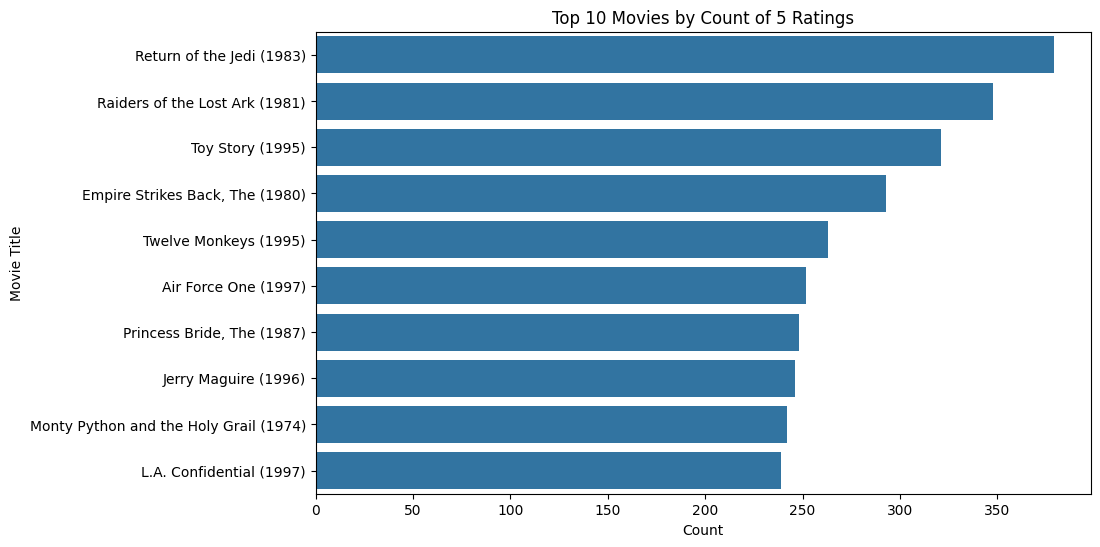

In [12]:
# Plot a histogram of the top 10 movies with their counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Movie Title', data=top_10_movies_with_titles)
plt.xlabel('Count')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Count of 5 Ratings')
plt.show()

These are the movies that have recieved the most 5* ratings, so we would expect to see these films appear quite a lot in our recommendations, there doesnt appear to be a clear favourite film however.

This is a suitable dataset for our project goals because
1) It is sparse (not all users rate all items) and has an uneven distribution of ratings. This allows testing for algorithms that can handle sparsity and imbalanced data effectively.
2) Though small, its structure mirrors that of larger datasets, making it a great testing ground before scaling up to larger recommender systems.

## Reference

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets:
History and Context. ACM Transactions on Interactive Intelligent
Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.
DOI=http://dx.doi.org/10.1145/2827872
